#### Sorting as Gradient Flow on the Permutohedron
- Jonathan Landers, 2025

This notebook contains code to generate the figures in the paper.

#### setup

In [1]:
import warnings
import matplotlib
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Method 1: More specific warning filter
warnings.filterwarnings("ignore", 
                       message=".*The PostScript backend does not support transparency.*", 
                       category=UserWarning)

# Method 2: Alternative way to target matplotlib warnings
matplotlib.set_loglevel("critical")  # Only show critical errors, ignore warnings

# Method 3: Using a regular expression pattern
import re
warnings.filterwarnings("ignore", 
                       message=str(re.compile("The PostScript backend does not support transparency.*")))

#### decision tree perspective

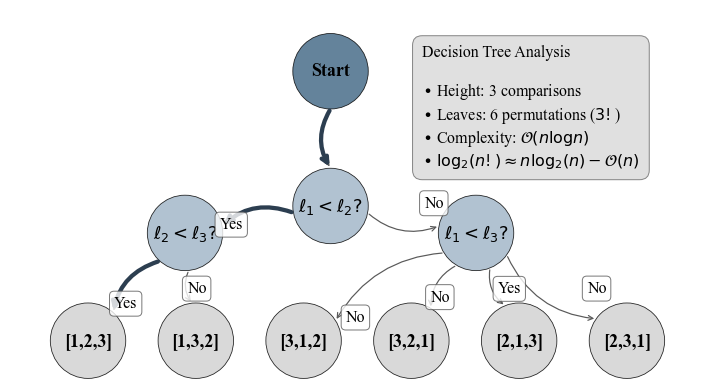

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math

# === STYLE SETTINGS ===
rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 9,
    'axes.titlesize': 9,
    'axes.labelsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'lines.linewidth': 1.5
})

# === COLORS ===
MAIN_BLUE      = '#4A6E8A'
SECONDARY_BLUE = '#A4B8C9'
HIGHLIGHT_COLOR= '#2C3E50'
GRAY_LIGHT     = '#D3D3D3'
GRAY_DARK      = '#5A5A5A'
BLACK          = '#000000'
WHITE          = '#FFFFFF'

# === FONT SIZES ===
LABEL_FONT = 18  # Increased node labels (was 12)
EDGE_FONT  = 16  # Increased edge labels (was 10)

# === NODE POSITIONS ===
# Adjusted positions to reduce overlapping
positions = {
    "Start":        (0, 0),
    r"$\ell_1 < \ell_2?$":     (0, -2.5),
    r"$\ell_2 < \ell_3?$":     (-2.7, -3),
    r"$\ell_1 < \ell_3?$":     (2.7, -3),
    "[1,2,3]":      (-4.5, -5),
    "[1,3,2]":      (-2.5, -5),
    "[3,1,2]":      (-0.5, -5),
    "[3,2,1]":      (1.5, -5),
    "[2,1,3]":      (3.5, -5),
    "[2,3,1]":      (5.5, -5),
}


# === EDGES ===
edges = [
    ("Start", r"$\ell_1 < \ell_2?$", ""),
    (r"$\ell_1 < \ell_2?$", r"$\ell_2 < \ell_3?$", "Yes"),
    (r"$\ell_2 < \ell_3?$", "[1,2,3]", "Yes"),
    (r"$\ell_2 < \ell_3?$", "[1,3,2]", "No"),
    (r"$\ell_1 < \ell_2?$", r"$\ell_1 < \ell_3?$", "No"),
    (r"$\ell_1 < \ell_3?$", "[2,1,3]", "Yes"),
    (r"$\ell_1 < \ell_3?$", "[2,3,1]", "No"),
    (r"$\ell_1 < \ell_3?$", "[3,1,2]", "No"),
    (r"$\ell_1 < \ell_3?$", "[3,2,1]", "No"),
]


# === NODE TYPES AND COLORS ===
node_types = {
    "Start": "start",
    r"$\ell_1 < \ell_2?$": "comparison",
    r"$\ell_2 < \ell_3?$": "comparison",
    r"$\ell_1 < \ell_3?$": "comparison",
    "[1,2,3]": "leaf",
    "[1,3,2]": "leaf",
    "[3,1,2]": "leaf",
    "[3,2,1]": "leaf",
    "[2,1,3]": "leaf",
    "[2,3,1]": "leaf",
}

node_colors = {
    "start": MAIN_BLUE,
    "comparison": SECONDARY_BLUE,
    "leaf": GRAY_LIGHT
}

# === CREATE FIGURE AND AXES ===
fig, ax = plt.subplots(figsize=(10, 8))  # Increased figure size for better spacing

# Increased node radius for better readability
node_radius = 0.7  # Was 0.6

# === DRAW NODES ===
for name, (x, y) in positions.items():
    color = node_colors[node_types[name]]
    circle = plt.Circle((x, y), node_radius, color=color, alpha=0.85, ec=BLACK, lw=0.8)
    ax.add_patch(circle)
    ax.text(x, y, name, ha='center', va='center',
            fontsize=LABEL_FONT, weight='bold', color=BLACK)

# === MODIFIED HELPER FUNCTION to place labels on arrow heads ===
def place_label_at_arrowhead(ax, x1, y1, x2, y2, label, curvature=0):
    """
    Places the 'Yes'/'No' label directly on top of the arrow head
    near the destination point (x2, y2).
    """
    # If using curved arrows, we need to calculate the actual endpoint
    # For curved paths, we need to approximate where the arrowhead will be
    if curvature != 0:
        # For curved paths, place label slightly before destination
        # This is an approximation as the exact curve calculation is complex
        t = 0.9  # Position along the path (90% toward destination)
        
        # Simple circular arc approximation
        angle = math.atan2(y2 - y1, x2 - x1)
        radius = 1.0 / curvature if curvature != 0 else float('inf')
        
        # Adjusted endpoint calculation for curved path
        # This is a simplified version that works for small curvatures
        dx = x2 - x1
        dy = y2 - y1
        dist = math.sqrt(dx**2 + dy**2)
        
        # Place label slightly before the arrow tip
        lx = x1 + t * dx
        ly = y1 + t * dy
        
        # Adjust for curvature (simplified)
        if curvature != 0:
            # Perpendicular offset approximation
            perp_x = -dy / dist
            perp_y = dx / dist
            lx += perp_x * curvature * dist * 0.5
            ly += perp_y * curvature * dist * 0.5
    else:
        # For straight paths, it's simpler
        lx = x2 - 0.15 * (x2 - x1)  # Position label just before the arrowhead
        ly = y2 - 0.15 * (y2 - y1)

    # Draw the text label with improved background box
    # Use elevated position to place label on top of the arrow
    vertical_offset = 0.2  # Small offset to place label above the arrow
    ax.text(lx, ly + vertical_offset, label,
            fontsize=EDGE_FONT, color=BLACK,
            bbox=dict(facecolor=WHITE, alpha=0.8, edgecolor=GRAY_DARK, pad=.28, boxstyle='round'),
            ha='center', va='center', zorder=5)  # Higher zorder to ensure it's on top

# === DRAW EDGES (arced for clarity) & place labels ===
for src, dst, label in edges:
    x1, y1 = positions[src]
    x2, y2 = positions[dst]
    
    # Calculate offset from centers based on node radius
    # This ensures arrows start and end at node boundaries
    dx = x2 - x1
    dy = y2 - y1
    length = (dx**2 + dy**2)**0.5
    
    if length > 0:
        # Normalize the direction vector
        dx /= length
        dy /= length
        
        # Start point: from source node boundary
        start_x = x1 + node_radius * dx
        start_y = y1 + node_radius * dy
        
        # End point: to destination node boundary
        end_x = x2 - node_radius * dx
        end_y = y2 - node_radius * dy
        
        # Draw the arrow with adjusted curvature based on distance
        curvature = min(0.3, 1.0/length)  # Adaptive curvature
        
        ax.annotate("",
            xy=(end_x, end_y), xytext=(start_x, start_y),
            arrowprops=dict(
                arrowstyle="->",
                color=GRAY_DARK,
                lw=1.2,
                mutation_scale=12,
                connectionstyle=f"arc3,rad={curvature}"
            )
        )
    
    # If there's a label (Yes/No), place it at the arrow head
    if label:
        place_label_at_arrowhead(ax, start_x, start_y, end_x, end_y, label, curvature)

# === HIGHLIGHT the optimal path with a thicker arrow ===
optimal_path = [
    ("Start", r"$\ell_1 < \ell_2?$"),
    (r"$\ell_1 < \ell_2?$", r"$\ell_2 < \ell_3?$"),
    (r"$\ell_2 < \ell_3?$", "[1,2,3]")
]
for src, dst in optimal_path:
    x1, y1 = positions[src]
    x2, y2 = positions[dst]
    
    # Similar adjustments for the highlighted path
    dx = x2 - x1
    dy = y2 - y1
    length = (dx**2 + dy**2)**0.5
    
    if length > 0:
        dx /= length
        dy /= length
        start_x = x1 + node_radius * dx
        start_y = y1 + node_radius * dy
        end_x = x2 - node_radius * dx
        end_y = y2 - node_radius * dy
        
        curvature = min(0.3, 1.0/length)
        
        ax.annotate("",
            xy=(end_x, end_y), xytext=(start_x, start_y),
            arrowprops=dict(
                arrowstyle="->",
                color=HIGHLIGHT_COLOR,
                lw=4.25,
                mutation_scale=15,
                connectionstyle=f"arc3,rad={curvature}"
            )
        )

# === IMPROVED INFO BOX ===
info_box_text = (
    "Decision Tree Analysis\n\n"
    r"$\bullet$ Height: 3 comparisons" "\n"
    r"$\bullet$ Leaves: 6 permutations ($3!$)" "\n"
    r"$\bullet$ Complexity: $\mathcal{O}(n \log n)$" "\n"
    r"$\bullet$ $\log_2(n!) \approx n \log_2(n) - \mathcal{O}(n)$"
)

ax.text(1.7, .5, info_box_text, fontsize=16,
        verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.6', facecolor=GRAY_LIGHT, edgecolor=GRAY_DARK, alpha=0.7),
        color=BLACK)

# === FINAL TOUCHES ===
ax.set_xlim(-6, 7)  # Expanded axis limits to accommodate new positions
ax.set_ylim(-5.8, 1.2)  # Just enough padding for circles and arrows
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()

# Save figure
plt.savefig("decision_tree.pdf", dpi=300, bbox_inches='tight')
plt.savefig("decision_tree.eps", dpi=300, bbox_inches='tight')
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')  # Added PNG format
#plt.savefig("decision_tree.pdf", dpi=300, bbox_inches='tight', pad_inches=0.01)

plt.show()

Figure 1 illustrates the 3-dimensional permutohedron $\mathcal{P}_3$, formed by the convex hull of permutations of $(1,2,3)$. The left panel shows the fundamental structure where vertices represent permutations and edges connect permutations differing by a single adjacent transposition. A sorting algorithm's execution corresponds to a path through this geometric structure, exemplified by the arrows tracing bubble sort's trajectory from $(3,2,1)$ to $(1,2,3)$. The right panel demonstrates how linear constraints—corresponding to comparisons—geometrically partition the space. The planes $x_1 = x_2$ and $x_2 = x_3$ divide $\mathcal{P}_3$ into regions, with the sorted permutation $(1,2,3)$ isolated in the region satisfying $x_1 < x_2 < x_3$. The sequence below shows the progressive refinement of the solution space: from the initial set of all 6 permutations, to 3 permutations after imposing $x_1 < x_2$, and finally to the unique sorted permutation after adding $x_2 < x_3$. This geometric interpretation reveals how $\mathcal{O}(n \log n)$ comparisons suffice to isolate one vertex from $n!$ possibilities, exemplifying how structured constraints enable efficient navigation of exponentially large spaces—a fundamental principle underlying the broader $P$ versus $NP$ question.

#### geometric perspective and the permutohedron

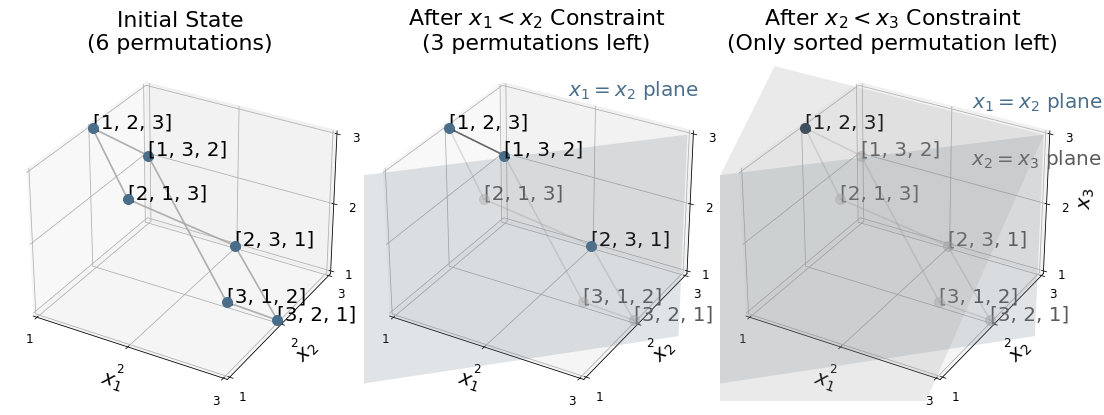

In [5]:
# !pip install matplotlib==3.3.4  # Uncomment if needed

import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np
from mpl_toolkits.mplot3d import proj3d
# from matplotlib.ticker import ScalarFormatter

# ===== COLOR SCHEME =====
MAIN_BLUE = '#4A6E8A'
SECONDARY_BLUE = '#A4B8C9'
HIGHLIGHT_COLOR = '#2C3E50'
GRAY_LIGHT = '#D3D3D3'
GRAY_MEDIUM = '#A9A9A9'
GRAY_DARK = '#5A5A5A'
BLACK = '#000000'
WHITE = '#FFFFFF'

# ===== FONT SIZE =====
MAIN_FONT_SIZE = 20
TITLE_FONT_SIZE = MAIN_FONT_SIZE + 2
SMALL_FONT_SIZE = MAIN_FONT_SIZE - 2

# Generate all permutations of (1, 2, 3)
perm = list(permutations([1, 2, 3]))
vertices = [list(p) for p in perm]
perm_to_idx = {perm[i]: i for i in range(len(perm))}

# Connect vertices that differ by one adjacent transposition
edges = []
for i, p1 in enumerate(perm):
    for j, p2 in enumerate(perm):
        diff_count = sum(1 for a, b in zip(p1, p2) if a != b)
        if diff_count == 2:
            for k in range(len(p1) - 1):
                if {p1[k], p1[k+1]} == {p2[k], p2[k+1]}:
                    edges.append((i, j))
                    break

# === FIGURE: Sequence of Constraint Pruning ===


fig2 = plt.figure(figsize=(15, 9))



ax3 = fig2.add_subplot(131, projection='3d')
ax4 = fig2.add_subplot(132, projection='3d')
ax5 = fig2.add_subplot(133, projection='3d')

# === Left: Initial State ===
for i, v in enumerate(vertices):
    ax3.scatter(*v, color=MAIN_BLUE, s=100)
    ax3.text(*v, str(v), fontsize=MAIN_FONT_SIZE)
for i, j in edges:
    ax3.plot([vertices[i][0], vertices[j][0]], [vertices[i][1], vertices[j][1]], [vertices[i][2], vertices[j][2]], color=GRAY_MEDIUM, alpha=0.7)
ax3.set_title("Initial State\n(6 permutations)", fontsize=TITLE_FONT_SIZE)
ax3.set_xlabel(r"$x_1$", fontsize=MAIN_FONT_SIZE)
ax3.set_ylabel(r"$x_2$", fontsize=MAIN_FONT_SIZE)
ax3.set_zlabel(r"$x_3$", fontsize=MAIN_FONT_SIZE)

# === Middle: After x₁ < x₂ ===
valid_indices = [i for i, p in enumerate(perm) if p[0] < p[1]]
for i, v in enumerate(vertices):
    valid = i in valid_indices
    ax4.scatter(*v, color=MAIN_BLUE if valid else GRAY_MEDIUM, s=100, alpha=1.0 if valid else 0.4)
    ax4.text(*v, str(v), fontsize=MAIN_FONT_SIZE, color=BLACK if valid else GRAY_DARK)
for i, j in edges:
    color = GRAY_DARK if i in valid_indices and j in valid_indices else GRAY_MEDIUM
    alpha = 0.7 if i in valid_indices and j in valid_indices else 0.2
    ax4.plot([vertices[i][0], vertices[j][0]], [vertices[i][1], vertices[j][1]], [vertices[i][2], vertices[j][2]], color=color, alpha=alpha)
xx, zz = np.meshgrid(range(0, 4), range(0, 4))
yy = xx
ax4.plot_surface(xx, yy, zz, alpha=0.2, color=SECONDARY_BLUE)
ax4.text(2, 2.5, 3.5, r"$x_1 = x_2$ plane", color=MAIN_BLUE, fontsize=MAIN_FONT_SIZE)
ax4.set_title(r"After $x_1 < x_2$ Constraint" + "\n(3 permutations left)", fontsize=TITLE_FONT_SIZE)
ax4.set_xlabel(r"$x_1$", fontsize=MAIN_FONT_SIZE)
ax4.set_ylabel(r"$x_2$", fontsize=MAIN_FONT_SIZE)
ax4.set_zlabel(r"$x_3$", fontsize=MAIN_FONT_SIZE)

# === Right: After x₂ < x₃ ===
valid_indices_final = [i for i, p in enumerate(perm) if p[0] < p[1] and p[1] < p[2]]
for i, v in enumerate(vertices):
    valid = i in valid_indices_final
    ax5.scatter(*v, color=HIGHLIGHT_COLOR if valid else GRAY_MEDIUM, s=100, alpha=1.0 if valid else 0.4)
    ax5.text(*v, str(v), fontsize=MAIN_FONT_SIZE, color=BLACK if valid else GRAY_DARK)
for i, j in edges:
    color = HIGHLIGHT_COLOR if i in valid_indices_final and j in valid_indices_final else GRAY_MEDIUM
    alpha = 0.7 if i in valid_indices_final and j in valid_indices_final else 0.2
    ax5.plot([vertices[i][0], vertices[j][0]], [vertices[i][1], vertices[j][1]], [vertices[i][2], vertices[j][2]], color=color, alpha=alpha)
xx, zz = np.meshgrid(range(0, 4), range(0, 4))
yy = xx
ax5.plot_surface(xx, yy, zz, alpha=0.2, color=SECONDARY_BLUE)
ax5.text(2.5, 2.5, 3.5, r"$x_1 = x_2$ plane", color=MAIN_BLUE, fontsize=MAIN_FONT_SIZE)
xx, yy = np.meshgrid(range(0, 4), range(0, 4))
zz = yy
ax5.plot_surface(xx, yy, zz, alpha=0.2, color=GRAY_MEDIUM)
ax5.text(2.5, 2.5, 2.7, r"$x_2 = x_3$ plane", color=GRAY_DARK, fontsize=MAIN_FONT_SIZE)
ax5.set_title(r"After $x_2 < x_3$ Constraint" + "\n(Only sorted permutation left)", fontsize=TITLE_FONT_SIZE)
ax5.set_xlabel(r"$x_1$", fontsize=MAIN_FONT_SIZE)
ax5.set_ylabel(r"$x_2$", fontsize=MAIN_FONT_SIZE)
ax5.set_zlabel(r"$x_3$", fontsize=MAIN_FONT_SIZE)

# Force axes to show [1,2,3] only
for ax in [ax3, ax4, ax5]:
    ax.set_xticks([1, 2, 3])
    ax.set_yticks([1, 2, 3])
    ax.set_zticks([1, 2, 3])
    ax.set_xlim([1, 3])
    ax.set_ylim([1, 3])
    ax.set_zlim([1, 3])
    ax.tick_params(axis='x', labelsize=12)  # Adjust the size (16) as needed
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='z', labelsize=12)


plt.tight_layout()
plt.savefig('permutohedron_sequence.png', dpi=300, bbox_inches='tight')
plt.savefig("permutohedron_sequence.pdf", dpi=300, bbox_inches='tight')
plt.savefig("permutohedron_sequence.eps", dpi=300, bbox_inches='tight')

plt.show()


Figure 2 presents the binary decision tree for sorting a list of three elements, illustrating how comparison-based algorithms navigate the permutation space. Each internal node represents a comparison operation, branching into two possible outcomes, while leaf nodes correspond to the six possible permutations in $S_3$. The highlighted path shows how just three comparisons—aligning with the information-theoretic lower bound $\lceil \log_2(3!) \rceil = 3$—suffice to identify the sorted permutation $[1,2,3]$. This decision structure exemplifies the core concept of Structured Logarithmic Descent: each comparison effectively eliminates half the remaining permutation space, reducing the exponential $\mathcal{O}(n!)$ possibilities to a tractable $\mathcal{O}(n \log n)$ search. The tree's height corresponds precisely to the worst-case complexity of optimal comparison-based sorting algorithms, demonstrating how structured constraints enable exponential reduction in search complexity—a fundamental principle that underlies the broader question of which problems in NP might admit polynomial-time solutions.

#### gradient flow on the permutohedron

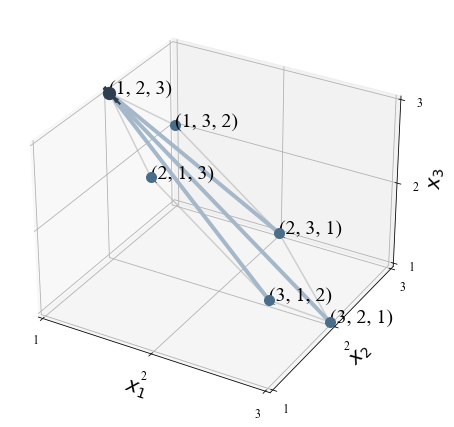

In [7]:
import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np

# === COLOR SCHEME ===
MAIN_BLUE = '#4A6E8A'
SECONDARY_BLUE = '#A4B8C9'
HIGHLIGHT_COLOR = '#2C3E50'
GRAY_LIGHT = '#D3D3D3'
GRAY_MEDIUM = '#A9A9A9'
GRAY_DARK = '#5A5A5A'
BLACK = '#000000'
WHITE = '#FFFFFF'

# === FONT SIZE ===
MAIN_FONT_SIZE = 20
TITLE_FONT_SIZE = MAIN_FONT_SIZE + 2

# Permutohedron vertices
perm = list(permutations([1, 2, 3]))
vertices = np.array([list(p) for p in perm])
sorted_vertex = np.array([1, 2, 3])

# Gradient flow calculation
def gradient_flow(x0, steps=100):
    t = np.linspace(0, 3, steps)
    flow = np.array([sorted_vertex + (x0 - sorted_vertex) * np.exp(-ti) for ti in t]).T
    return flow

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw permutohedron edges
for i, v_start in enumerate(vertices):
    for v_end in vertices[i+1:]:
        if np.sum(np.abs(v_start - v_end)) == 2:
            ax.plot(*zip(v_start, v_end), color=GRAY_MEDIUM, alpha=0.5)

# Plot vertices
for v in vertices:
    ax.scatter(*v, color=MAIN_BLUE, s=100)
    ax.text(*v, str(tuple(v)), fontsize=MAIN_FONT_SIZE, color=BLACK)

# Highlight sorted vertex
ax.scatter(*sorted_vertex, color=HIGHLIGHT_COLOR, s=150)

# Plot gradient flows from selected unsorted states
initial_states = [np.array([3, 2, 1]), np.array([2, 3, 1]), np.array([3, 1, 2])]
arrow_size = 0.2  # adjust to make arrows larger or smaller
for state in initial_states:
    flow = gradient_flow(state)
    ax.plot(flow[0], flow[1], flow[2], linestyle='-', linewidth=4, color=SECONDARY_BLUE)

    # Adding explicit arrowheads
    dx, dy, dz = flow[:, -1] - flow[:, -2]
    ax.quiver(flow[0, -2], flow[1, -2], flow[2, -2],
              dx, dy, dz,
              arrow_length_ratio=0.5,  # Increase for larger heads
              linewidth=2,
              color=HIGHLIGHT_COLOR, 
              pivot='tail', length=arrow_size, normalize=True)

# Styling the plot
#ax.set_title('Gradient Flow on the Permutohedron', fontsize=TITLE_FONT_SIZE)
ax.set_xlabel(r"$x_1$", fontsize=MAIN_FONT_SIZE)
ax.set_ylabel(r"$x_2$", fontsize=MAIN_FONT_SIZE)
ax.set_zlabel(r"$x_3$", fontsize=MAIN_FONT_SIZE)

# Axes adjustments
ax.set_xticks([1, 2, 3])
ax.set_yticks([1, 2, 3])
ax.set_zticks([1, 2, 3])
ax.set_xlim([1, 3])
ax.set_ylim([1, 3])
ax.set_zlim([1, 3])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)

plt.tight_layout()
plt.savefig('gradient_flow_permutohedron.png', dpi=300, bbox_inches='tight')
plt.savefig('gradient_flow_permutohedron.pdf', dpi=300, bbox_inches='tight')
plt.savefig('gradient_flow_permutohedron.eps', dpi=300, bbox_inches='tight')

plt.show()

**Figure 3**: Gradient flow on the permutohedron illustrating exponential contraction toward the sorted permutation. Vertices correspond to unique permutations, with intermediate lines depicting trajectories of gradient descent driven by the disorder potential $V(x) = \frac{1}{2}\|x - v_s\|^2$. The highlighted paths demonstrate rapid convergence from initial unsorted states via exponential decay of disorder, linking continuous geometric dynamics directly to discrete sorting steps. For instance, starting at vertex $(3, 2, 1)$, the gradient flow moves continuously along adjacent edges toward the sorted vertex $(1, 2, 3)$, resolving inversions step-by-step. This visualization highlights the geometric foundations underlying the classical $\Omega(n \log n)$ sorting complexity bound established in Theorem 5.